<a href="https://colab.research.google.com/github/techshot25/MachineLearningPractice/blob/master/Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import pandas_datareader.data as web 
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

# read data from Yahoo finance API
df = web.DataReader('TSLA', 'yahoo', start, end)

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


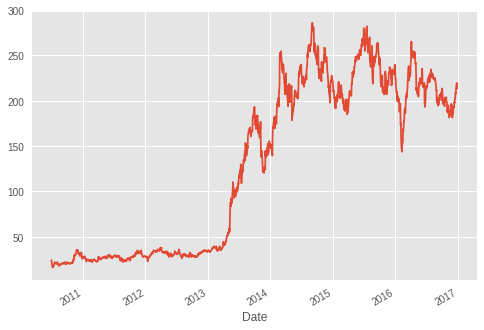

In [7]:
df['Adj Close'].plot()

In [0]:
# add a column for 100 moving average
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()

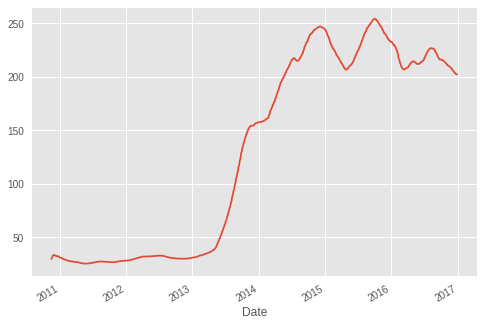

In [12]:
df['100ma'].plot()

In [14]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2016-12-23,213.449997,207.710007,208.000000,213.339996,4662900,213.339996,202.6190
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999,202.5082
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005,202.4053
2016-12-29,219.199997,214.119995,218.559998,214.679993,4035900,214.679993,202.2905
2016-12-30,217.500000,211.679993,216.300003,213.690002,4642600,213.690002,202.1366


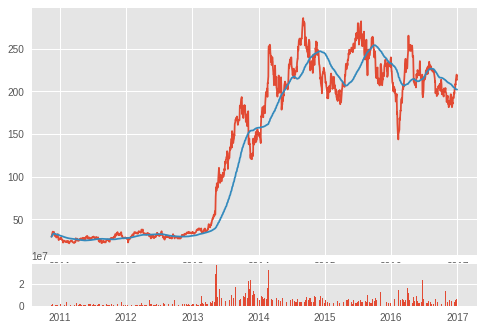

In [18]:
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan = 1, colspan = 1, sharex = ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()